### Target:
    
    - Getting the model skeleton right.

### Results:

    - Model has 500k parameters.

    - Train Accuracy = 99.86

    - Test Accuracy = 99.16

### Analysis:

    - Squeeze expand skeleton gradually increasing channels to 256.

    - Model is still large and overfitting.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model2 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model2                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 64, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 32, 28, 28]          288                         0.06%
│    └─ReLU: 2-2                         [64, 32, 28, 28]          [64, 32, 28, 28]          --                             --
│    └─Conv2d: 2-3                       [64, 32, 28, 28]          [64, 64, 28, 28]          18,432                      3.71%
│    └─ReLU: 2-4                         [64, 64, 28, 28]          [64, 64, 28, 28]          --                             --
├─Sequential: 1-2                        [64, 64, 28, 28]          [64, 32, 14, 14]          --                

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0962 Batch_id=937 Average Loss=1.2789 Accuracy=52.70: 100%|██████████| 938/938 [00:46<00:00, 20.04it/s]


Test set: Average loss: 0.1062, Accuracy: 9673/10000 (96.73%)

Epoch 2


Train: Batch Loss=0.0952 Batch_id=937 Average Loss=0.0854 Accuracy=97.43: 100%|██████████| 938/938 [00:43<00:00, 21.43it/s]


Test set: Average loss: 0.0407, Accuracy: 9858/10000 (98.58%)

Epoch 3


Train: Batch Loss=0.0037 Batch_id=937 Average Loss=0.0490 Accuracy=98.50: 100%|██████████| 938/938 [00:48<00:00, 19.18it/s]


Test set: Average loss: 0.0514, Accuracy: 9842/10000 (98.42%)

Epoch 4


Train: Batch Loss=0.0205 Batch_id=937 Average Loss=0.0365 Accuracy=98.83: 100%|██████████| 938/938 [00:43<00:00, 21.75it/s]


Test set: Average loss: 0.0389, Accuracy: 9882/10000 (98.82%)

Epoch 5


Train: Batch Loss=0.0143 Batch_id=937 Average Loss=0.0272 Accuracy=99.14: 100%|██████████| 938/938 [00:53<00:00, 17.69it/s]


Test set: Average loss: 0.0397, Accuracy: 9874/10000 (98.74%)

Epoch 6


Train: Batch Loss=0.0002 Batch_id=937 Average Loss=0.0207 Accuracy=99.37: 100%|██████████| 938/938 [00:43<00:00, 21.46it/s]


Test set: Average loss: 0.0340, Accuracy: 9894/10000 (98.94%)

Epoch 7


Train: Batch Loss=0.0002 Batch_id=937 Average Loss=0.0172 Accuracy=99.41: 100%|██████████| 938/938 [00:41<00:00, 22.68it/s]


Test set: Average loss: 0.0330, Accuracy: 9892/10000 (98.92%)

Epoch 8


Train: Batch Loss=0.0015 Batch_id=937 Average Loss=0.0149 Accuracy=99.55: 100%|██████████| 938/938 [00:56<00:00, 16.72it/s]


Test set: Average loss: 0.0294, Accuracy: 9907/10000 (99.07%)

Epoch 9


Train: Batch Loss=0.0001 Batch_id=937 Average Loss=0.0109 Accuracy=99.67: 100%|██████████| 938/938 [00:43<00:00, 21.37it/s]


Test set: Average loss: 0.0360, Accuracy: 9902/10000 (99.02%)

Epoch 10


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0093 Accuracy=99.70: 100%|██████████| 938/938 [00:43<00:00, 21.70it/s]


Test set: Average loss: 0.0299, Accuracy: 9911/10000 (99.11%)

Epoch 11


Train: Batch Loss=0.0007 Batch_id=937 Average Loss=0.0086 Accuracy=99.68: 100%|██████████| 938/938 [00:42<00:00, 21.97it/s]


Test set: Average loss: 0.0369, Accuracy: 9887/10000 (98.87%)

Epoch 12


Train: Batch Loss=0.0604 Batch_id=937 Average Loss=0.0075 Accuracy=99.74: 100%|██████████| 938/938 [00:43<00:00, 21.79it/s]


Test set: Average loss: 0.0345, Accuracy: 9902/10000 (99.02%)

Epoch 13


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0051 Accuracy=99.81: 100%|██████████| 938/938 [00:44<00:00, 20.99it/s]


Test set: Average loss: 0.0438, Accuracy: 9907/10000 (99.07%)

Epoch 14


Train: Batch Loss=0.0001 Batch_id=937 Average Loss=0.0070 Accuracy=99.77: 100%|██████████| 938/938 [00:44<00:00, 21.00it/s]


Test set: Average loss: 0.0324, Accuracy: 9916/10000 (99.16%)

Epoch 15


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0044 Accuracy=99.86: 100%|██████████| 938/938 [00:40<00:00, 22.91it/s]


Test set: Average loss: 0.0329, Accuracy: 9915/10000 (99.15%)



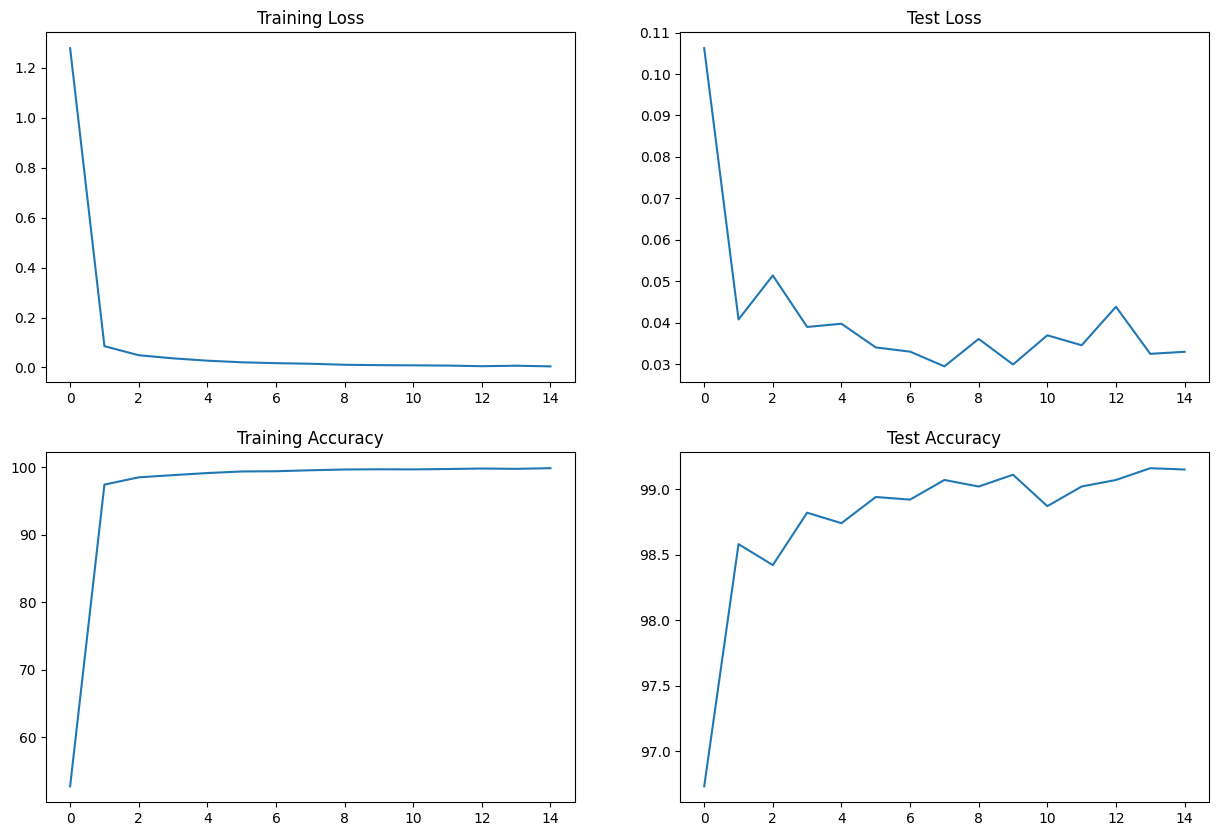

In [10]:
from utils import plot_stats
plot_stats()

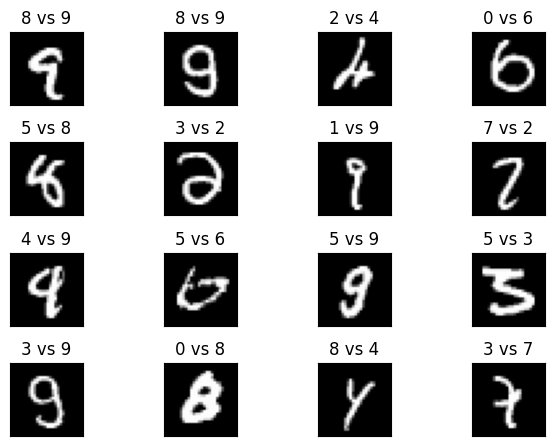

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual